<a href="https://colab.research.google.com/github/Chengs-c/cnn-project/blob/main/geodata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive # 此时colab中出现drive的文件夹，里面就是你的google drive的根目录文件

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. 验证身份并创建pydrive客户端.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive 参考:
# https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html

# 2. 创建并上传一个文本文档.
#uploaded = drive.CreateFile({'title': 'Sample upload.txt'})
#uploaded.SetContentString('Sample upload file content')
#uploaded.Upload()
#print('Uploaded file with ID {}'.format(uploaded.get('id')))

# 3. 通过id访问文件并输出它的内容.
downloaded1 = drive.CreateFile({'id': uploaded.get('id')})
print('Downloaded content "{}"'.format(downloaded1.GetContentString()))

NameError: ignored

In [ ]:
downloaded2 = drive.CreateFile({'seis.csv': uploaded.get('seis.csv')})
print('Downloaded content "{}"'.format(downloaded2.GetContentfloat()))

AttributeError: ignored

In [ ]:
import os
from google.colab import drive


os.chdir("drive/Colab Notebook/di data")
os.listdir(path)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np



读取csv

In [50]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file   #在此处吧你的文件id改进去
downloaded = drive.CreateFile({'id':'https://drive.google.com/file/d/16OdKcs6fMW1CdM-2n0Y_Vt6t1dbTWpEz/view?usp=sharing'}) # replace the id with id of file you want to access
#输入你的文件名字
#downloaded.GetContentFile('')



# 新段落

In [ ]:
#输入你的文件名字
#downloaded.GetContentFile('Ip.csv')

#3. Read file as panda dataframe
import pandas as pd
Ip = pd.read_csv('Ip.csv') 

In [4]:
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive"

os.chdir(path)
os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Colab Notebooks',
 'geo data',
 'seis.csv',
 'Sample upload.txt',
 'Ip.csv',
 'test.jpg']

In [5]:
import pandas as pd
Ip = pd.read_csv('Ip.csv') 

In [6]:

seis = pd.read_csv('seis.csv') 

In [51]:
seis.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.13561,0.13562,0.13563,0.13564,0.13565,0.13566,0.13567,0.13568,0.13569,0.13570,0.13571,0.13572,0.13573,0.13574,0.13575,0.13576,0.13577,0.13578,0.13579,0.13580,0.13581,0.13582,0.13583,0.13584,0.13585,0.13586,0.13587,0.13588,0.13589,0.13590,0.13591,0.13592,0.13593,0.13594,0.13595,0.13596,0.13597,0.13598,0.13599,0.13600
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 80
batch_size = 100
learning_rate = 0.001

In [16]:
import numpy as np

seis_mat = np.array(seis)
seis_mat1=np.array(seis,dtype=np.float32)
seis_tensor2 = torch.tensor(seis_mat1).t()

Ip_mat = np.array(Ip)
Ip_mat1=np.array(Ip,dtype=np.float32)
Ip_tensor2 = torch.tensor(Ip_mat1).t()

In [11]:
print(seis.shape)

(2799, 13601)


筛选行

In [17]:
import numpy as np
seis1=seis.iloc[:,[i%100==0 for i in range(len(seis.columns))]]

Ip1=Ip.iloc[:,[i%100==0 for i in range(len(Ip.columns))]]

seis_mat = np.array(seis1)
seis_mat1=np.array(seis1,dtype=np.float32)
seis_tensor1 = torch.tensor(seis_mat1)
Ip_mat = np.array(Ip1)
Ip_mat1=np.array(Ip1,dtype=np.float32)
Ip_tensor1 = torch.tensor(Ip_mat1)

In [14]:
print(seis_mat1.shape)

(2799, 137)


In [ ]:
print(Ip_tensor2.shape)

torch.Size([13601, 2799])


In [15]:
import tensorflow as tf
torch.seed()
tensor_test1 = tf.constant([1, 2, 3, 4, 5, 6, 7,8])
print(tensor_test1)
tensor_test2=tf.reshape(tensor_test1,[2,4])
print(tensor_test2)
tensor_test3=tf.reshape(tensor_test2,[4,2,1])
print(tensor_test3)



tf.Tensor([1 2 3 4 5 6 7 8], shape=(8,), dtype=int32)
tf.Tensor(
[[1 2 3 4]
 [5 6 7 8]], shape=(2, 4), dtype=int32)
tf.Tensor(
[[[1]
  [2]]

 [[3]
  [4]]

 [[5]
  [6]]

 [[7]
  [8]]], shape=(4, 2, 1), dtype=int32)


加载数据集

In [18]:
import torch
from torch.utils.data import Dataset,DataLoader
seis_tensor=seis_tensor1.t()
Ip_tensor=Ip_tensor1.t()
print(seis_tensor.shape)
def loaddata():
    return seis, Ip

class GeoDataset(Dataset):
    def __init__(self,seis,Ip):
        #   传入参数
        #   ndarray 类型的，可以是任何类型的
        self.seis = seis
        self.Ip = Ip
        self.lens = len(seis)

    def __getitem__(self, index):
        # index是方法自带的参数，获取相应的第index条数据
        return self.seis[index,:],self.Ip[index,:]

    def __len__(self):

        return self.lens

torch.Size([137, 2799])


In [19]:

data,target = loaddata()
dataset_geo = GeoDataset(seis_tensor,Ip_tensor)



In [20]:


print(len(dataset_geo))
all_length = len(dataset_geo)
print(all_length)
train_size = int(0.80 * all_length)
print(train_size)
test_size = all_length - train_size

train_dataset,test_dataset = torch.utils.data.random_split(dataset_geo,[train_size,test_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

137
137
109


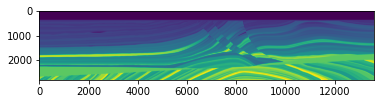

In [16]:
import matplotlib.pyplot as plt
plt.imshow(seis)
plt.imshow(Ip)

full connected

In [21]:
num_epochs=4
# Fully connected neural network with one hidden layer
input_size=2799
hidden_size=4000
num_classes=2799
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

In [22]:
seis_tensor3 = seis_tensor2.reshape(-1,input_size).to(device)
Ip_tensor3=Ip_tensor2.to(device)
print(seis_tensor3.shape)
print(Ip_tensor3.shape)
outputs = model(seis_tensor3)
loss = criterion(outputs, Ip_tensor3)
print(loss)


torch.Size([13601, 2799])
torch.Size([13601, 2799])
tensor(24.9381, device='cuda:0', grad_fn=<MseLossBackward>)


In [ ]:
print(outputs.shape)
#output_ima=outputs.numpy()
#plt.imshow(output_ima)
from  torchvision import utils as vutils
vutils.save_image(outputs, './test.jpg', normalize=True)


torch.Size([13601, 2799])


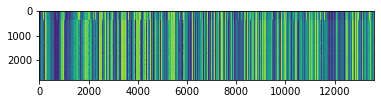

In [23]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

# loader使用torchvision中自带的transforms函数
loader = transforms.Compose([
    transforms.ToTensor()])  

unloader = transforms.ToPILImage()
image_test1=unloader(outputs.t())
plt.imshow(image_test1)

In [ ]:
outputs_num=outputs.t().cpu().detach().numpy()

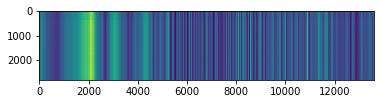

In [24]:
outputs_num=outputs.t().cpu().detach().numpy()
plt.imshow(outputs_num)

In [ ]:
print(outputs[700,700])

tensor(3.2541, grad_fn=<SelectBackward>)


In [ ]:
#t_dataset,t_dataset = torch.utils.data.random_split(dataset_geo,[all,test_size])
t_loader = torch.utils.data.DataLoader(dataset_geo, batch_size=len(dataset_geo), shuffle=False, num_workers=2)
for i, (image,labels) in enumerate(t_loader):
  images = images.reshape(-1, input_size).to(device)
  labels = labels.to(device)
  outputs = model(images)
  print(outputs.shape)
  outputs1=np.array(outputs)
  plt.imshow(outputs1)
  loss = criterion(outputs, labels)
  print(loss)

In [25]:
def conv300x1(in_channels,out_channels,stride=1):
  return nn.Conv1d(in_channels,out_channels,kernel_size=300,stride=stride,padding=0,bias=False)
def conv3x1(in_channels,out_channels,stride=1):
  return nn.Conv1d(in_channels,out_channels,kernel_size=3,stride=stride,padding=0,bias=False)

In [26]:
class conv1(nn.Module):
  def __init__(self,in_channels,out_channels,stride=1,downsample=None):
      super(conv1,self).__init__()
      self.conv1=conv300x1(in_channels,out_channels,stride)
      self.bn1=nn.BatchNorm1d(out_channels)
      self.relu = nn.ReLU(inplace=True)
      self.conv2 = conv3x1(out_channels, 1)
      self.fc = nn.Linear(2498, num_classes)

  def forward(self, x):
      residual = x
      out = self.conv1(x)
      out = self.bn1(out)
      out = self.relu(out)
      out = self.conv2(out)
      out = self.fc(out)
      return out

In [27]:
data,target1 = loaddata()
dataset_geo1 = GeoDataset(seis_tensor.reshape(-1,1,2799),Ip_tensor.reshape(-1,1,2799))
print(seis_tensor.reshape(-1,1,2799).shape)
print(len(dataset_geo1))
all_length = len(dataset_geo1)
print(all_length)
train_size = int(0.80 * all_length)
print(train_size)
test_size = all_length - train_size

train_dataset,test_dataset = torch.utils.data.random_split(dataset_geo1,[train_size,test_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

torch.Size([137, 1, 2799])
137
137
109


In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
model2 = conv1(1,64).to(device)
summary(model2,(1,2799))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [-1, 64, 2500]          19,200
       BatchNorm1d-2             [-1, 64, 2500]             128
              ReLU-3             [-1, 64, 2500]               0
            Conv1d-4              [-1, 1, 2498]             192
            Linear-5              [-1, 1, 2799]       6,994,701
Total params: 7,014,221
Trainable params: 7,014,221
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 3.70
Params size (MB): 26.76
Estimated Total Size (MB): 30.47
----------------------------------------------------------------


In [54]:

num_epochs=200
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)

# For updating learning rate
def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# Train the model
total_step = len(train_loader)
curr_lr = learning_rate
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        #print(images.shape)
        # Forward pass
        outputs = model2(images)
        #print(outputs.shape)
        #print(labels.shape)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Decay learning rate
    if (epoch+1) % 50 == 0:
        curr_lr /= 3
        update_lr(optimizer, curr_lr)

RuntimeError: ignored

In [55]:
import numpy as np
seis1=seis.iloc[:,[i%100==0 for i in range(len(seis.columns))]]

Ip1=Ip.iloc[:,[i%100==0 for i in range(len(Ip.columns))]]

seis_mat = np.array(seis1)
seis_mat1=np.array(seis1,dtype=np.float32)
seis_tensor1 = torch.tensor(seis_mat1)
Ip_mat = np.array(Ip1)
Ip_mat1=np.array(Ip1,dtype=np.float32)
Ip_tensor1 = torch.tensor(Ip_mat1)

In [31]:
print(Ip_tensor2.shape)

torch.Size([13601, 2799])


In [57]:

seis_tensor4 = seis_tensor2[1:100,:].reshape(-1,1,input_size).to(device)
Ip_tensor4=Ip_tensor2[1:100,:].reshape(-1,1,input_size).to(device)
print(seis_tensor4.shape)
print(Ip_tensor4.shape)
outputs = model2(seis_tensor4)
loss = criterion(outputs, Ip_tensor4)

print(loss)

torch.Size([99, 1, 2799])
torch.Size([99, 1, 2799])


RuntimeError: ignored

In [58]:
for i in range(1,150):
    seis_tensor4 =seis_tensor2[i*100+1:(i+1)*100,:].reshape(-1,1,input_size).to(device)
    Ip_tensor4=Ip_tensor2[i*100+1:(i+1)*100,:].reshape(-1,1,input_size).to(device)
    outputs1 = model2(seis_tensor4)
    loss1 = criterion(outputs1, Ip_tensor4)
    outputs=torch.cat([outputs,outputs1],dim=0)
    loss=loss+loss1
print(loss/136)

RuntimeError: ignored

res

In [ ]:
def conv300x1(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=(300,1), 
                     stride=stride, padding=0, bias=False)
def conv3x1(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=(300,1), 
                     stride=stride, padding=0, bias=False)

In [ ]:
# Residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv300x1(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x1(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample
        
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        #if self.downsample:
        if reisual.shape != out.shape:
          residual = self.downsample(x)
        print('x',x.shape)
        print('residual',residual.shape)
        print('out',out.shape)
        out += residual
        out = self.relu(out)
        return out

NameError: ignored

In [ ]:
# Residual block
class ResidualBlock2(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock2, self).__init__()
        self.conv1 = conv300x1(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.fc=nn.Linear(out_channels,2799)
        
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.fc(out)
        return out

In [ ]:
# ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=2799):
        super(ResNet, self).__init__()
        self.in_channels = 1
        self.conv = conv300x1(1,16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.in_channels = 16
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[1], 2)
        self.layer3 = self.make_layer(block, 64, layers[2], 2)
        self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)
        
    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels) :
            downsample = nn.Sequential(
                conv300x1(self.in_channels, out_channels, stride=stride),
                conv3x1(out_channels,out_channels,stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        #for i in range(1, blocks):
        #    layers.append(block(out_channels, out_channels,stride,downsample))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [ ]:
data,target = loaddata()
dataset_geo = GeoDataset(seis_tensor.reshape(-1,1,2799,1),Ip_tensor.reshape(-1,1,2799,1))
print(seis_tensor.reshape(-1,1,2799,1).shape)
print(len(dataset_geo))
all_length = len(dataset_geo)
print(all_length)
train_size = int(0.80 * all_length)
print(train_size)
test_size = all_length - train_size

train_dataset,test_dataset = torch.utils.data.random_split(dataset_geo,[train_size,test_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

torch.Size([137, 1, 2799, 1])
137
137
109


In [ ]:
model = ResNet(ResidualBlock, [1, 1, 1]).to(device)
summary(model,(1,2799,1))

NameError: ignored

In [ ]:

model = ResNet(ResidualBlock, [2, 2, 2]).to(device)

model2=ResidualBlock2(1,16).to(device)
# Loss and optimizer
criterion = nn.MSELoss
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# For updating learning rate
def update_lr(optimizer, lr):    
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# Train the model
total_step = len(train_loader)
curr_lr = learning_rate
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        print(images.shape)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Decay learning rate
    if (epoch+1) % 20 == 0:
        curr_lr /= 3
        update_lr(optimizer, curr_lr)

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'resnet.ckpt')

torch.Size([100, 1, 2799, 1])


RuntimeError: ignored